### How to analyze data from different formats, like text from social media:

In [1]:
#!pip install python-dotenv

In [2]:
from dotenv import load_dotenv
from os import getenv

In [3]:
#chek if works:
load_dotenv()

APP_NAME = getenv("APP_NAME")
print(APP_NAME)

aging_healthy_factors


In [4]:
import requests
import json
import pandas as pd

In [5]:
# Load from the .env
load_dotenv()

# Get the environmental variables
APP_NAME = getenv('APP_NAME')
APP_ID = getenv("APP_ID")
APP_SECRET = getenv("APP_SECRET")
REDDIT_USERNAME = getenv('REDDIT_USERNAME')
REDDIT_PASSWORD = getenv('REDDIT_PASSWORD')

In [6]:
# Check that the variables all loaded
if APP_NAME and APP_ID and APP_SECRET and REDDIT_USERNAME and REDDIT_PASSWORD:
    print("Success!!")
else:
    print("ERROR: Credentials not loaded!!")

Success!!


In [7]:
REDDIT_USERNAME

'gracie_m_ludwig'

In [8]:
# Sets up the authentication part of the request
auth = requests.auth.HTTPBasicAuth(f'{APP_ID}', f'{APP_SECRET}')

In [9]:
auth

In [10]:
# this requests header gives reddit a brief description of the app
# os:app_name:version (by /u/username)   (format used by reddit to request data)
headers = {'User-Agent': f'windows:{APP_NAME}:v1.0 (by /u/{APP_ID})'}
data = {'grant_type': 'client_credentials'}  # app id and secret

In [11]:
# Makes the request to the access_token api endpoint, and saves the response in res
res = requests.post('https://www.reddit.com/api/v1/access_token', auth=auth, headers=headers)

In [12]:
res   # 200 means is working

<Response [200]>

In [13]:
# Makes the request to the access_token api endpoint, and saves the response in res
res = requests.post('https://www.reddit.com/api/v1/access_token',
                    auth=auth, data=data, headers=headers)

# Converts response to JSON and pull access_token value
TOKEN = res.json()['access_token']

# Adds authorisation to our headers dictionary
headers = {**headers, **{'Authorization': f"bearer {TOKEN}"}}

# While the token is valid (~2 hours) we can just add headers=headers to our requests to prove authentication
# Making a test request. <Response [200]> means that it was a success!
requests.get('https://oauth.reddit.com/api/v1/me', headers=headers)

<Response [200]>

In [35]:
res = requests.get("https://oauth.reddit.com/r/ireland/comments/1b9w5td/is_our_healthcare_system_really_this_bad/", headers=headers)

print(res.json())

[{'kind': 'Listing', 'data': {'after': None, 'dist': 1, 'modhash': '', 'geo_filter': '', 'children': [{'kind': 't3', 'data': {'approved_at_utc': None, 'subreddit': 'ireland', 'selftext': 'Woke up last Friday with vertigo, a banging headache, neck pain and nausea. So off to the GP I went who referred me to A&amp;E because he suspected meningitis. Arrived at James\'s Hospital at 11am. In there for 12 hours before they decided to admit me and do a lumbar puncture. Lumbar puncture didn\'t show any thing. Woke up on Saturday and they said they need to keep me to do an MRI. \n\nSymptoms continue to get serverly worse from here. At this point I am not eating at all as well. Something I didn\'t know about hospitals is there\'s barely if any consultants or staff working over the weekend. This means I needed to wait until Sunday afternoon to do the MRI. MRI showed nothing too. However, my symptoms are worsening. 9.5/10 painful headaches, puking bile, can barely move my neck. \n\nWoke up Monday a

In [36]:
# Loop through all the results, printing the titles of each
for post in res.json()['data']['children']:
    print(post['data']['title'])

TypeError: list indices must be integers or slices, not str

In [37]:
import pprint
pprint.pprint(res.json())

[{'data': {'after': None,
           'before': None,
           'children': [{'data': {'all_awardings': [],
                                  'allow_live_comments': False,
                                  'approved_at_utc': None,
                                  'approved_by': None,
                                  'archived': True,
                                  'author': 'MrPureskill',
                                  'author_flair_background_color': None,
                                  'author_flair_css_class': None,
                                  'author_flair_richtext': [],
                                  'author_flair_template_id': None,
                                  'author_flair_text': None,
                                  'author_flair_text_color': None,
                                  'author_flair_type': 'text',
                                  'author_fullname': 't2_ihrrl',
                                  'author_is_blocked': False,
               

                                                                                                                                                                                           'children': [{'data': {'all_awardings': [],
                                                                                                                                                                                                                  'approved_at_utc': None,
                                                                                                                                                                                                                  'approved_by': None,
                                                                                                                                                                                                                  'archived': True,
                                                                           

                        {'data': {'all_awardings': [],
                                  'approved_at_utc': None,
                                  'approved_by': None,
                                  'archived': True,
                                  'associated_award': None,
                                  'author': 'IntentionFalse8822',
                                  'author_flair_background_color': None,
                                  'author_flair_css_class': None,
                                  'author_flair_richtext': [],
                                  'author_flair_template_id': None,
                                  'author_flair_text': None,
                                  'author_flair_text_color': None,
                                  'author_flair_type': 'text',
                                  'author_fullname': 't2_5u6j1ixs',
                                  'author_is_blocked': False,
                                  'author_patreon_flair': Fals

In [40]:
data.keys()

dict_keys(['grant_type'])

In [50]:
import praw   # sentimental analyzes using praw

In [42]:
reddit = praw.Reddit(
    client_id=getenv("APP_ID"), 
    client_secret=getenv("APP_SECRET"), 
   user_agent=f"{getenv('APP_NAME')}u/{getenv('REDDIT_USERNAME')}", 
)

In [43]:
load_dotenv() 

True

In [44]:
url = "https://www.reddit.com/r/ireland/comments/1b9w5td/is_our_healthcare_system_really_this_bad/"

In [45]:
post = reddit.submission(url=url)    # to get the title of the comment
print(post.title)
print(post.selftext)

Is our healthcare system really this bad?
Woke up last Friday with vertigo, a banging headache, neck pain and nausea. So off to the GP I went who referred me to A&E because he suspected meningitis. Arrived at James's Hospital at 11am. In there for 12 hours before they decided to admit me and do a lumbar puncture. Lumbar puncture didn't show any thing. Woke up on Saturday and they said they need to keep me to do an MRI. 

Symptoms continue to get serverly worse from here. At this point I am not eating at all as well. Something I didn't know about hospitals is there's barely if any consultants or staff working over the weekend. This means I needed to wait until Sunday afternoon to do the MRI. MRI showed nothing too. However, my symptoms are worsening. 9.5/10 painful headaches, puking bile, can barely move my neck. 

Woke up Monday and the consultant said I just have migraines and I am being discharged with some paracetamol. This is despite no history of migraines previously and being in 

In [46]:
for comment in post.comments:    # only top level comment, not nested
    print(comment.body)

Also you may want to get in contact with the flight company to let them know. You had meningitis on a full plane of people. You could have passed it on.
Make sure you go back to the consultant in SJUH with the results from Germany and let them know what happened.

Edit to add: I’m not saying as a complaint but as a general follow up and for all health professionals learning.
I'm delighted you were diagnosed, (look after yourself now ! , I hope it all works out 


but please send your results from Germany back to the hospital/doctor 

You should show them this
A friend of mine had an brain bleed and was saved by emegency surgery in CUH, all happened including ambulance ride in under and hour... 100% saved his life, so pretty amazing. However recovery was a disaster, he ended up getting a bacterial infection (undiagnosed) on the plate they put in his skull that made hem terrible sick and in pain for 2 years. He was more or less fobbed off. Ended up requesting his records and sending them

In [48]:
health_comments = [comment.body for comment in post.comments]
ie_comments_df = pd.DataFrame(transp_comments, columns=['Comment Body'])

In [51]:
ie_comments_df.head()

,Comment Body
0,Also you may want to get in contact with the f...
1,Make sure you go back to the consultant in SJU...
2,"I'm delighted you were diagnosed, (look after ..."
3,A friend of mine had an brain bleed and was sa...
4,"Had a similar story, but with viral meningitis..."


In [52]:
ie_comments_df.shape

(116, 1)

In [60]:
ie_comments_df.reset_index(inplace=True)
ie_comments_df.rename(columns={'index': 'Id'}, inplace=True)

In [53]:
import nltk      # import libraries to clean data 
from nltk.corpus import stopwords
nltk.download('stopwords')

C:\Users\graci\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\graci\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [55]:
sia = SentimentIntensityAnalyzer()

In [57]:
sia.polarity_scores("Pretty much every one you'll speak to has a hse horror story.")

{'neg': 0.233, 'neu': 0.566, 'pos': 0.201, 'compound': -0.128}

In [61]:
# run in the entire dataset using a loop
res = {}
for i, row in tqdm(ie_comments_df.iterrows(), total=len(ie_comments_df)):
    text = row['Comment Body']
    id = row['Id']
    res[id] = sia.polarity_scores(text)
             

  0%|          | 0/116 [00:00<?, ?it/s]

In [62]:
res

{0: {'neg': 0.0, 'neu': 0.957, 'pos': 0.043, 'compound': 0.0772},
 1: {'neg': 0.0, 'neu': 0.925, 'pos': 0.075, 'compound': 0.2718},
 2: {'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'compound': 0.7463},
 3: {'neg': 0.133, 'neu': 0.756, 'pos': 0.111, 'compound': -0.5571},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.214, 'neu': 0.69, 'pos': 0.097, 'compound': -0.8176},
 6: {'neg': 0.257, 'neu': 0.726, 'pos': 0.017, 'compound': -0.9808},
 7: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 8: {'neg': 0.184, 'neu': 0.719, 'pos': 0.097, 'compound': -0.9719},
 9: {'neg': 0.073, 'neu': 0.827, 'pos': 0.1, 'compound': 0.1189},
 10: {'neg': 0.114, 'neu': 0.7, 'pos': 0.186, 'compound': 0.3597},
 11: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 12: {'neg': 0.143, 'neu': 0.857, 'pos': 0.0, 'compound': -0.9136},
 13: {'neg': 0.096, 'neu': 0.798, 'pos': 0.107, 'compound': 0.5449},
 14: {'neg': 0.017, 'neu': 0.932, 'pos': 0.051, 'compound': 0.5574},
 15: {'neg

In [63]:
pd.DataFrame(res).T

,neg,neu,pos,compound
0,0.000,0.957,0.043,0.0772
1,0.000,0.925,0.075,0.2718
2,0.000,0.786,0.214,0.7463
3,0.133,0.756,0.111,-0.5571
4,0.000,1.000,0.000,0.0000
...,...,...,...,...
111,0.114,0.754,0.132,0.2944
112,0.000,0.332,0.668,0.9335
113,0.000,1.000,0.000,0.0000
114,0.371,0.629,0.000,-0.7574


In [64]:
# transform the res into a dataframe, t = transpose it, and use the reset index function , rename columns
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'Id', 'neg': 'negative', 'neu': 'neutral', 'pos': 'positive' })

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

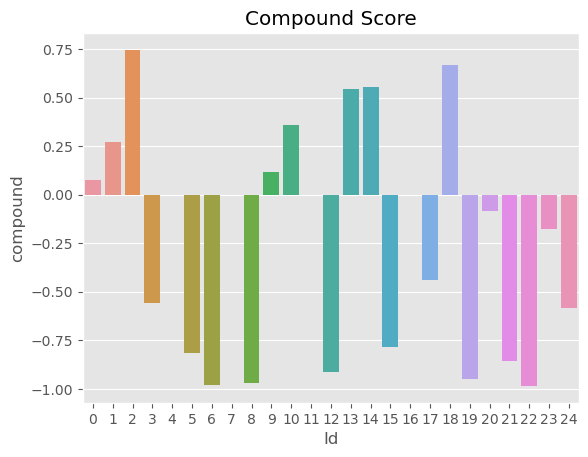

In [71]:
ax = sns.barplot(data=vaders.head(25), x='Id', y='compound')
ax.set_title('Compound Score')
figsize=(20, 8)
plt.show()

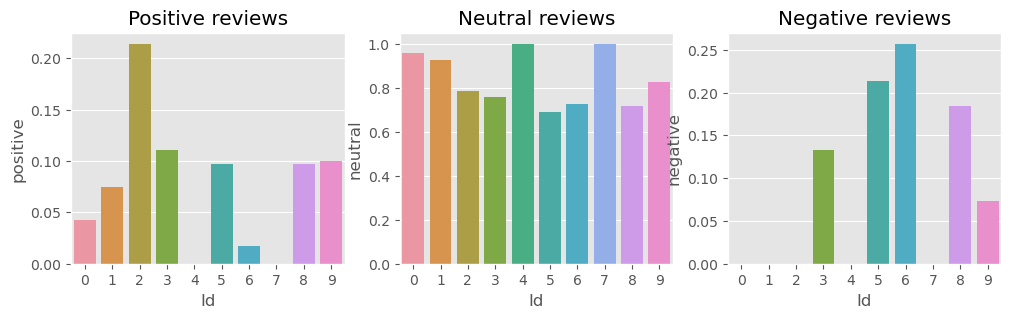

In [67]:
# you can also visualize them separatly
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders.head(10), x= 'Id', y='positive', ax=axs[0])
sns.barplot(data=vaders.head(10), x= 'Id', y='neutral', ax=axs[1])
sns.barplot(data=vaders.head(10), x= 'Id', y='negative', ax=axs[2])
axs[0].set_title('Positive reviews')
axs[1].set_title('Neutral reviews')
axs[2].set_title('Negative reviews')
plt.show()